# Examples of Persistence Diagrams

We now understand the pipeline for creating a persistence diagram from a dataset:
In this notebook, we will look at a few more examples of persistence diagrams generated from toy datasets and make sense out of them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from sklearn.metrics import pairwise_distances

import gudhi as gd

## Some 2-Dimensional Datasets

Let's look at a dataset consisting of a pair of circles in the plane. We can parameterize our example by including a variable radius and offset parameter. One circle will always be radius 1, centered at the origin. The other circle will be variable. We can also include variable noise terms.

In [2]:
def create_circle_data(radius, x_offset, noise1 = 0.5, noise2 = 0.5, num_points1 = 50, num_points2 = 50):
    
    A = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size = num_points1)
    A = A.T/np.linalg.norm(A,axis = 1)
    A = A.T + noise1*np.random.rand(num_points1,2)

    B = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size = num_points2)
    B = radius*B.T/np.linalg.norm(B,axis = 1)
    B = B.T + noise2*np.random.rand(num_points2,2) + [x_offset,0]

    X = np.concatenate((A,B))
    
    return X

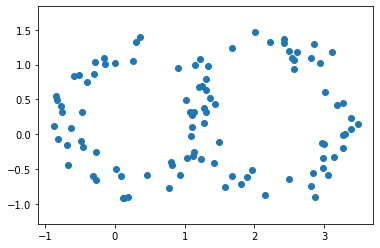

In [3]:
X = create_circle_data(1,2)

plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

The following function will take a point cloud and produce either barcodes or persistence diagrams.

In [4]:
def visualize_persistent_homology(X, style = 'barcodes', max_dimension = 2):

    """
    In: X is a Euclidean point cloud of size [num_points,dimension]
        style = 'barcodes' or 'diagrams'
        max_dimension = highest dimensional skeleton of the VR complex to compute. Highest degree
        persistent homology will be one less than this.
    Out: plots either persistence barcodes or persistence diagrams
    """
    
    D = pairwise_distances(X)
    skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 10) 
    Rips_complex = skeleton.create_simplex_tree(max_dimension = max_dimension)
    BarCodes = Rips_complex.persistence()

    if style == 'barcodes':
        for dim in range(max_dimension):
            print('Dimension',dim)
            plt.figure()
            gd.plot_persistence_barcode([bar for bar in BarCodes if bar[0] == dim])
            plt.show()
    elif style == 'diagrams':
        plt.figure()
        gd.plot_persistence_diagram(BarCodes)
        plt.show()
            
    return

Let's test it:

Dimension 0


<Figure size 432x288 with 0 Axes>

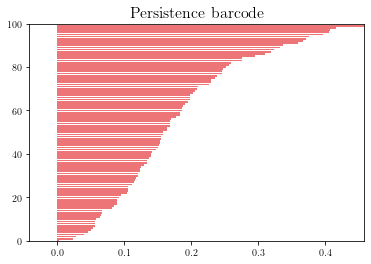

Dimension 1


<Figure size 432x288 with 0 Axes>

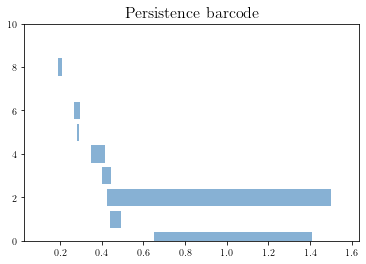

In [5]:
visualize_persistent_homology(X)

<Figure size 432x288 with 0 Axes>

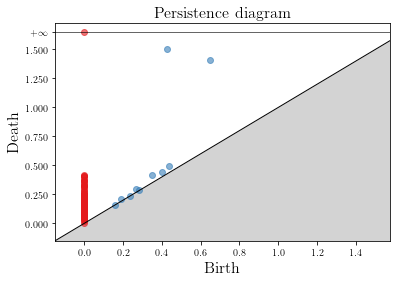

In [6]:
visualize_persistent_homology(X, style = 'diagrams')

Now we can try this on different point clouds and see if the results make sense.

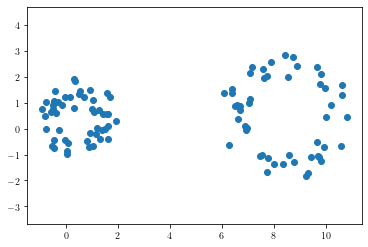

Dimension 0


<Figure size 432x288 with 0 Axes>

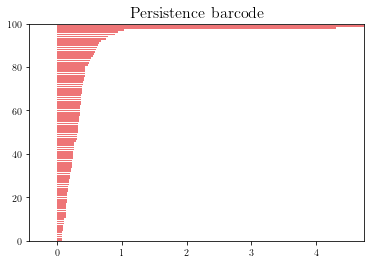

Dimension 1


<Figure size 432x288 with 0 Axes>

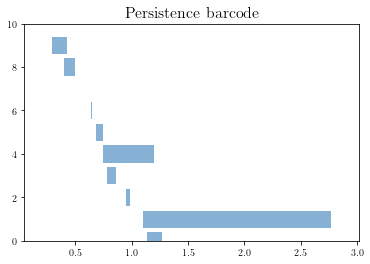

<Figure size 432x288 with 0 Axes>

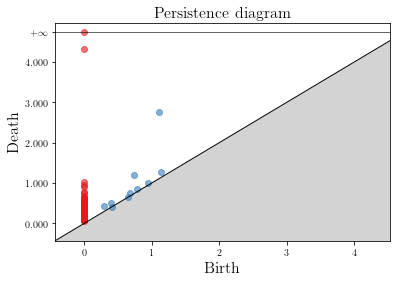

In [7]:
# Pick parameters:
radius = 2
x_offset = 8
noise1 = 1
noise2 = 1
num_points1 = 50
num_points2 = 50

X = create_circle_data(radius,x_offset,noise1 = noise1, noise2 = noise2, num_points1 = num_points1, num_points2 = num_points2)

plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

visualize_persistent_homology(X)

visualize_persistent_homology(X, style = 'diagrams')

## 3-Dimensional Datasets